# Model Evaluation on Car Price classification

## [Kaggle Dataset](https://www.kaggle.com/datasets/CooperUnion/cardataset)

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-03 09:31:27--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  1.87MB/s    in 0.8s    

2023-10-03 09:31:29 (1.87 MB/s) - ‘data.csv’ saved [1475504/1475504]



### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`


In [2]:
sel_col = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 
           'highway MPG', 'city mpg', 'MSRP']

In [4]:
import pandas as pd
df_orig = pd.read_csv('data.csv')

In [5]:
df = df_orig[sel_col]

In [11]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [12]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [13]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


#### Fill the missing values with 0

In [14]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [15]:
df.fillna(value=0, inplace=True)

/var/folders/qz/wxrcy0tx4y98bsrt32ftxztm0000gn/T/ipykernel_24768/1020030758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(value=0, inplace=True)


In [16]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

#### Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

In [19]:
msrp_avg = df.msrp.mean()
msrp_avg

40594.737032063116

In [25]:
df['above_average'] = (df.msrp >= msrp_avg).astype(int)

/var/folders/qz/wxrcy0tx4y98bsrt32ftxztm0000gn/T/ipykernel_24768/3204204888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df.msrp >= msrp_avg).astype(int)


In [26]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [27]:
target = 'above_average'

### Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [28]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [34]:
df_train.size, df_val.size, df_test.size

(78628, 26213, 26213)

In [54]:
df_train = df_train.reset_index(drop=False)
df_val = df_val.reset_index(drop=False)
df_test = df_test.reset_index(drop=False)

y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]

del df_train[target]
del df_val[target]
del df_test[target]

In [55]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [56]:
# Find numerical features
df_train.head()

,index,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17


In [57]:
num_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [58]:
df_train[num_features].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,280.0,6.0,28,27
1,300.0,6.0,30,18
2,259.0,4.0,27,19
3,280.0,6.0,25,17
4,283.0,6.0,25,17


In [59]:
from sklearn.metrics import roc_auc_score
for feature in num_features:
    auc = roc_auc_score(y_train, df_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[feature])
    print(f"{feature}, {auc}")

engine_hp, 0.9171031265539011
engine_cylinders, 0.766116490165669
highway_mpg, 0.6330587871772013
city_mpg, 0.6734244643245233


> **Answer** `engine_hp`

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [65]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [140]:
def train(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse = False)

    train_dicts = df_train.to_dict(orient='records')

    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model


In [141]:
dv, model = train(df_train, y_train)

In [142]:
def predict(df, dv, model):
    df_dicts = df.to_dict(orient='records')
    X = dv.transform(df_dicts)
    y_pred = model.predict(X)
    return y_pred

In [143]:
y_pred = predict(df_val, dv, model)

In [144]:
auc = roc_auc_score(y_val, y_pred)

In [145]:
round(auc, 3)

0.887

> **Answer** `0.878 is nearest`

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [76]:
import numpy as np
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [117]:
actual_positive = y_val == 1
actual_negative = y_val != 1

In [119]:
actual_positive.shape

(2383,)

In [120]:
actual_positive.sum(), actual_negative.sum()

(654, 1729)

In [121]:
def predict_probability(df, dv, model):
    df_dicts = df.to_dict(orient='records')
    X = dv.transform(df_dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [122]:
y_pred = predict_probability(df_val, dv, model)

In [123]:
y_pred.shape

(2383,)

In [124]:
scores = []

for t in thresholds:
    predict_positive = y_pred >= t
    predict_negative = y_pred < t
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    score = (t, tp, tn, fp, fn, precision, recall)
    scores.append(score)

/var/folders/qz/wxrcy0tx4y98bsrt32ftxztm0000gn/T/ipykernel_24768/4084783570.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [125]:
scores

[(0.0, 654, 0, 1729, 0, 0.27444397817876626, 1.0),
 (0.01, 652, 374, 1355, 2, 0.32486297957149973, 0.9969418960244648),
 (0.02, 652, 609, 1120, 2, 0.36794582392776526, 0.9969418960244648),
 (0.03, 652, 760, 969, 2, 0.4022208513263418, 0.9969418960244648),
 (0.04, 651, 851, 878, 3, 0.42576847612818836, 0.9954128440366973),
 (0.05, 651, 930, 799, 3, 0.4489655172413793, 0.9954128440366973),
 (0.06, 650, 981, 748, 4, 0.46494992846924177, 0.9938837920489296),
 (0.07, 646, 1050, 679, 8, 0.48754716981132074, 0.9877675840978594),
 (0.08, 643, 1097, 632, 11, 0.504313725490196, 0.9831804281345565),
 (0.09, 641, 1153, 576, 13, 0.5267050123253904, 0.9801223241590215),
 (0.1, 638, 1172, 557, 16, 0.5338912133891214, 0.9755351681957186),
 (0.11, 635, 1196, 533, 19, 0.5436643835616438, 0.9709480122324159),
 (0.12, 631, 1222, 507, 23, 0.554481546572935, 0.9648318042813455),
 (0.13, 630, 1243, 486, 24, 0.5645161290322581, 0.963302752293578),
 (0.14, 627, 1263, 466, 27, 0.5736505032021958, 0.958715596330

In [126]:
# tp, tn, fp, fn, precision, recall
columns = ['threshold', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)

In [127]:
df_scores.head()

,threshold,tp,tn,fp,fn,precision,recall
0,0.00,654,0,1729,0,0.274444,1.000000
1,0.01,652,374,1355,2,0.324863,0.996942
2,0.02,652,609,1120,2,0.367946,0.996942
3,0.03,652,760,969,2,0.402221,0.996942
4,0.04,651,851,878,3,0.425768,0.995413


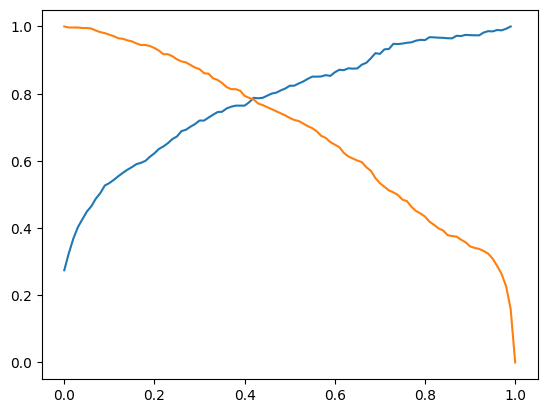

In [129]:
from matplotlib import pyplot as plt
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall')

> **Answer** `0.48`

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [131]:
df_scores['f1'] = (2 * df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

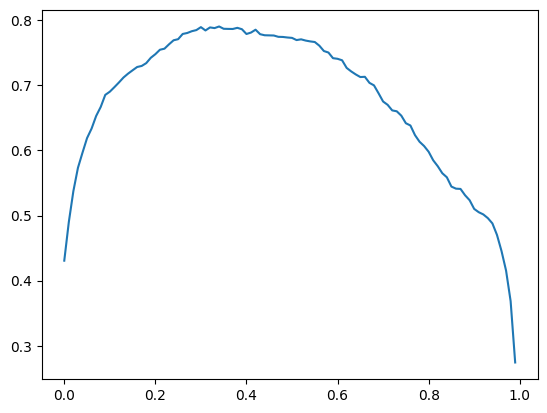

In [132]:
plt.plot(df_scores['threshold'], df_scores['f1'], label='F1 Score')

> **Answer** `0.72`

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [134]:
df_full_train.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
2711,Mercedes-Benz,CLK-Class,2007,382.0,8.0,AUTOMATIC,Coupe,22,15,54900,1
333,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,29990,0
9377,GMC,Sierra 1500,2017,285.0,6.0,AUTOMATIC,Extended Cab Pickup,24,18,32230,0
939,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,102930,1
5675,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,28795,0


In [133]:
# Initialize kfold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [137]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    df_train = df_train.reset_index(drop=False)
    df_val = df_val.reset_index(drop=False)
    
    y_train = df_train[target]
    y_val = df_val[target]
    
    del df_train[target]
    del df_train['msrp']
    del df_val[target]
    del df_val['msrp']
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    

    

In [138]:
np.std(scores)

0.014321707835858464

> **Answer** `0.014`

### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [146]:
total_scores = []
for c in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        df_train = df_train.reset_index(drop=False)
        df_val = df_val.reset_index(drop=False)

        y_train = df_train[target]
        y_val = df_val[target]

        del df_train[target]
        del df_train['msrp']
        del df_val[target]
        del df_val['msrp']

        dv, model = train(df_train, y_train, c)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    mean = round(np.mean(scores), 3)
    std = round(np.std(scores), 3)
    score = (c, mean, std)
    total_scores.append(score)

In [147]:
total_scores

[(0.01, 0.832, 0.012),
 (0.1, 0.881, 0.005),
 (0.5, 0.89, 0.006),
 (10, 0.895, 0.009)]

> **Answer** `10` best mean value is 0.895 and corrosponding c value is 10